In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Imports**

In [2]:
import pandas as pd
import numpy as np
import cv2 #allow to read images
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


***Data Understanding***

In [3]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
for col in df.columns:
    print(col, ": ", df[[col]].nunique())

label :  label    10
dtype: int64
pixel0 :  pixel0    1
dtype: int64
pixel1 :  pixel1    1
dtype: int64
pixel2 :  pixel2    1
dtype: int64
pixel3 :  pixel3    1
dtype: int64
pixel4 :  pixel4    1
dtype: int64
pixel5 :  pixel5    1
dtype: int64
pixel6 :  pixel6    1
dtype: int64
pixel7 :  pixel7    1
dtype: int64
pixel8 :  pixel8    1
dtype: int64
pixel9 :  pixel9    1
dtype: int64
pixel10 :  pixel10    1
dtype: int64
pixel11 :  pixel11    1
dtype: int64
pixel12 :  pixel12    3
dtype: int64
pixel13 :  pixel13    3
dtype: int64
pixel14 :  pixel14    2
dtype: int64
pixel15 :  pixel15    2
dtype: int64
pixel16 :  pixel16    1
dtype: int64
pixel17 :  pixel17    1
dtype: int64
pixel18 :  pixel18    1
dtype: int64
pixel19 :  pixel19    1
dtype: int64
pixel20 :  pixel20    1
dtype: int64
pixel21 :  pixel21    1
dtype: int64
pixel22 :  pixel22    1
dtype: int64
pixel23 :  pixel23    1
dtype: int64
pixel24 :  pixel24    1
dtype: int64
pixel25 :  pixel25    1
dtype: int64
pixel26 :  pixel26    1


In [8]:
tryp=df.head(1)

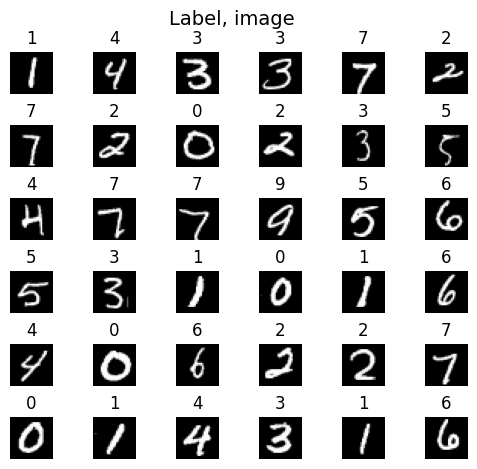

In [9]:
fig,axes = plt.subplots(6,6, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

m = df.shape[0]


for i,ax in enumerate(axes.flat):
    # selecting random indices
    random_index = np.random.randint(m)
    
    x_random_reshaped = df.drop(columns="label").iloc[random_index].values.reshape(28, 28)

    ax.imshow(x_random_reshaped, cmap='gray')
    y=df["label"]
    ax.set_title(y[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [10]:
def displayImage(X, y, i):
    # Reshaping the dataframe to visualize
    x_reshaped = X.iloc[i].values.reshape(28, 28)

    plt.figure(figsize=(6, 6))  # Increased figure size for better visibility
    plt.imshow(x_reshaped, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {y.iloc[i]}', fontsize=16)
    plt.gca().set_aspect('equal', adjustable='box')  # Maintain aspect ratio
    plt.show()


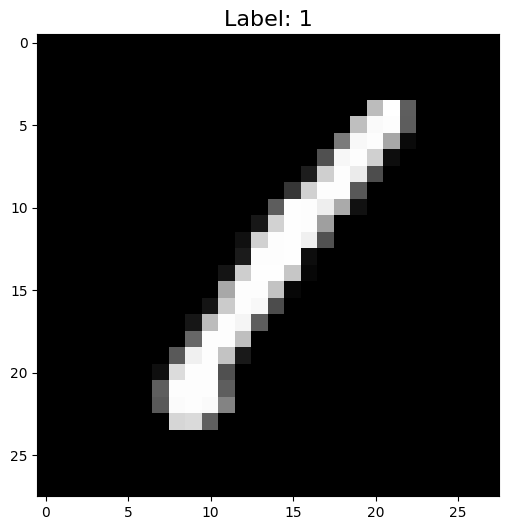

In [11]:
displayImage(df.drop(columns="label"),df["label"],0)

In [12]:
def display_digit(x):
    fig,ax = plt.subplots(1,1, figsize=(1,1))
    x_reshaped = x.values.reshape(28,28)
    ax.imshow(x_reshaped, cmap='gray')
    plt.show()

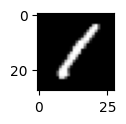

In [13]:
display_digit(df.drop(columns="label").iloc[0])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='label'),df["label"],test_size=0.3,random_state=42)

**Modeling**

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Input,Flatten,Dropout,BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [86]:
model=Sequential([
    Dense(units=128,activation="relu"),
    Dense(units=64,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=10,activation='linear'),
    
]
)

In [87]:
model.compile(optimizer='Adam',loss=SparseCategoricalCrossentropy(from_logits=True))

In [88]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.2082
Epoch 2/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4195
Epoch 3/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1703
Epoch 4/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7856
Epoch 5/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3626
Epoch 6/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2263
Epoch 7/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1667
Epoch 8/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1411
Epoch 9/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1159
Epoch 10/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1062
Epoch 11/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0956
Epoch 12/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0754
Epoch 13/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0715
Epoch 14/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0704
Epoch 15/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3

In [89]:
#here the model predicts the logits (the z in the description above)
logits=model.predict(X_test)

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [92]:
#tf.nn.softmax applies the softmax alogrithm to the logits in order to give us the probabilty of each logit being one of the labels
real_preds=tf.nn.softmax(logits)

In [ ]:
real_preds


The output you shared for real_preds indicates that your softmax function has correctly produced probabilities for each class (0-9). Each row corresponds to an instance, and each column corresponds to the probability of that instance belonging to a particular class. The values are between 0 and 1 and should sum to 1 for each row

In [95]:
#To convert these probabilities into class labels (integers from 0 to 9),
class_labels=tf.argmax(real_preds,axis=1)

In [96]:
class_labels

<tf.Tensor: shape=(12600,), dtype=int64, numpy=array([8, 1, 9, ..., 5, 5, 0])>

In [98]:

accuracy=accuracy_score(y_test,class_labels)

In [99]:
accuracy

0.9683333333333334

**Test**

In [101]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
model.fit(df.drop(columns='label'),df['label'],epochs=100)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0645
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0477
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0521
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0290
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0303
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0364
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0308
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0304
Epoch 9/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0228
Epoch 10/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0294
Epoch 11/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0358
Epoch 12/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0183
Epoch 13/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0336
Epoch 14/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0262
Epoch 15/100
13

In [105]:
test_logits=model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [106]:
test_predictions=tf.nn.softmax(test_logits)

In [107]:
result=tf.argmax(test_predictions,axis=1)

In [110]:
result

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

**Convolutional Neural Network**

Executi l code hdha l marra jya toul

In [41]:
cnn = Sequential()

In [42]:
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)

In [43]:
cnn.add(Input(shape=(28, 28, 1)))

# First convolutional layer
cnn.add(Conv2D(100, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))

# Second convolutional layer
cnn.add(Conv2D(62, (2, 2), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D((2, 2)))

# Third convolutional layer
cnn.add(Conv2D(60, (2, 2), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [44]:
cnn.add(Dropout(0.25))
# Flatten the feature maps to feed into a fully connected layer
cnn.add(Flatten())

# Fully connected layer
cnn.add(Dense(64, activation='relu'))
#cnn.add(Dropout(0.25))

cnn.add(Dense(10, activation='linear')) 



In [45]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=1e-6)

In [46]:
# Compile the cnn
cnn.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True))

# Print the cnn summary
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 90)     │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 90)     │           360 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 90)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 62)     │        22,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 62)     │           248 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 62)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 60)       │        14,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 60)       │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        15,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,144 (215.41 KB)

 Trainable params: 54,720 (213.75 KB)

 Non-trainable params: 424 (1.66 KB)

In [47]:
cnn.fit(X_train_reshaped,y_train,epochs=100,callbacks=[early_stopping, reduce_lr]
       )

Epoch 1/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.4986 - learning_rate: 0.0010
Epoch 2/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0854 - learning_rate: 0.0010
Epoch 3/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0599 - learning_rate: 0.0010
Epoch 4/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0510 - learning_rate: 0.0010
Epoch 5/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0425 - learning_rate: 0.0010
Epoch 6/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0385 - learning_rate: 0.0010
Epoch 7/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0315 - learning_rate: 0.0010
Epoch 8/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0285 - learning_rate: 0.0010
Epoch 9/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0305 - learning_rate: 0.0010
Epoch 10/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0284 - learning_rate: 0.0010
Epoch 11/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0213 - learni

In [48]:
cnn_logits=cnn.predict(X_test.values.reshape(-1,28,28,1))

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
cnn_preds=tf.nn.softmax(cnn_logits)

In [50]:
cnn_real_preds=tf.argmax(cnn_preds,axis=-1)

In [51]:
cnn_real_preds

<tf.Tensor: shape=(12600,), dtype=int64, numpy=array([8, 1, 9, ..., 5, 5, 0])>

In [52]:
accuracy=accuracy_score(cnn_real_preds,y_test)

In [53]:
accuracy

0.9926190476190476

In [54]:
accuracy

0.9926190476190476

In [55]:
accuracy

0.9926190476190476

Test

In [56]:
X=df.drop(columns='label').values.reshape(-1,28,28,1)

In [57]:
cnn.fit(X,df['label'],epochs=100,callbacks=[early_stopping, reduce_lr]
       )

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0147 - learning_rate: 1.0000e-06
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0151 - learning_rate: 1.0000e-06
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0145 - learning_rate: 1.0000e-06
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0165 - learning_rate: 1.0000e-06
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0191 - learning_rate: 1.0000e-06


In [58]:
cnn_test_logits=cnn.predict(test.values.reshape(-1,28,28,1))

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [59]:
cnn_test_logits.shape

(28000, 10)

In [60]:
cnn_test_preds=tf.nn.softmax(cnn_test_logits)

In [61]:
cnn_test_res=tf.argmax(cnn_test_preds,axis=-1)

In [62]:
cnn_test_res

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

**Output**

In [63]:
samples=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [64]:
samples

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [65]:
output = pd.DataFrame({'ImageId': samples["ImageId"], 'Label': cnn_test_res})
output.to_csv('CeVNNrxevt.csv', index=False)